# Lab 2

# Exercise 1

Train a classifier to distinguish between images of cats and dogs.

* Use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/).
* Fine-tune a 34-layer ResNet model for 1 epoch
* Report the error rate on a held-out validation set of 20% of the data.

In [1]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
# Cat images have filenames that start with a capital letter.
def is_cat(filename):
    return filename[0].isupper()

image_files = get_image_files(path).sorted()

# Construct the data loader
set_seed(12345, reproducible=True)
dataloaders = ImageDataLoaders.from_name_func(
    path=path,
    fnames=image_files,
    # Use a 20% validation split, with a seed of 42 for reproducibiliy
    valid_pct=0.2,
    seed=42,
    # label files using their name
    label_func=is_cat,
    # Resize all images to 224x224 pixels
    item_tfms=Resize(224),
    # Use a batch size of 8 images
    bs=8
)

In [4]:
learn = cnn_learner(
    dls=dataloaders,
    arch=resnet34,
    metrics=error_rate
)
learn.fine_tune(epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,0.220826,0.065281,0.020298,01:43


epoch,train_loss,valid_loss,error_rate,time
0,0.088009,0.019216,0.005413,02:37


In [14]:
dataloaders.train.bs

8

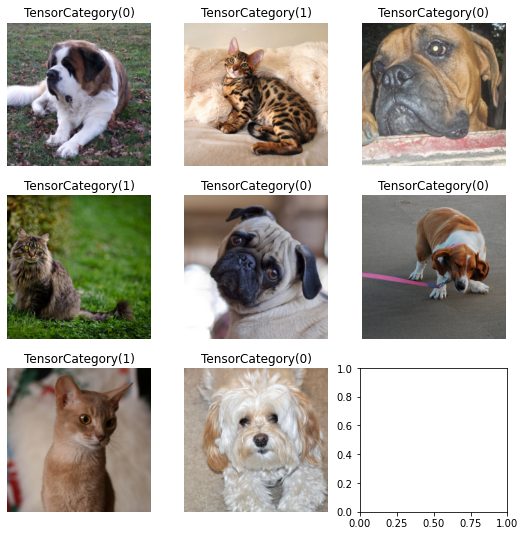

In [16]:
batch_transformed = dataloaders.train.one_batch()
batch = dataloaders.train.decode(batch_transformed)
images_orig, labels = batch
images = images_orig.clone()

show_image_batch((images, labels))